In [1]:
import re
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Q1

In [2]:
#Read files
df_labels = pd.read_csv('C:\Users\Abraham\Desktop\UT\MSBA\Python\HW\labels.txt', \
                 sep='\t', header=None, dtype=unicode, names=['turk', 'url', 'category'])

df_gold = pd.read_csv('C:\Users\Abraham\Desktop\UT\MSBA\Python\HW\gold.txt', \
                 sep='\t', header=None, dtype=unicode, names=['url', 'category'])

# Q2

In [3]:
#Merge to get just urls that have a gold/true rating
df_labels_ongold = df_gold.merge(df_labels, 
                                left_on = 'url',
                                right_on = 'url', 
                                suffixes = ['_gold','_label'])

#Merge (left join) and only keep urls that DON'T have a gold/true rating
df_labels_unknown = df_labels.merge(df_gold,
                                left_on = 'url',
                                right_on = 'url', 
                                suffixes = ['_label', '_gold'],
                                   how = 'left')

#Drop gold column because all the ones left are blank
df_labels_unknown = df_labels_unknown[df_labels_unknown['category_gold'].isnull()].drop(columns='category_gold')

df_labels_ongold

,url,category_gold,turk,category_label
0,http://0800-horoscope.com,G,A1253FXHCZ9CWM,G
1,http://0800-horoscope.com,G,A153PKAL7OAY36,G
2,http://0800-horoscope.com,G,A1FV9SAPL5C6KY,G
3,http://0800-horoscope.com,G,A1JTOT0DWM6QGL,G
4,http://0800-horoscope.com,G,A1PXXEOGQ76RNJ,G
5,http://0800-horoscope.com,G,A21US576U8SCO4,G
6,http://0800-horoscope.com,G,A22C0PJUBFJTI0,G
7,http://0800-horoscope.com,G,A270HOAHEVIFW0,G
8,http://0800-horoscope.com,G,A2EG8FHODTEV63,R
9,http://0800-horoscope.com,G,A2LM400F4F0V0M,G


# Q3

In [4]:
#Create dummy variable 'Correct' if the turk got the rating correctly
df_labels_ongold.loc[df_labels_ongold['category_gold'] == df_labels_ongold['category_label'], 'Correct'] = 1
df_labels_ongold.loc[df_labels_ongold['category_gold'] != df_labels_ongold['category_label'], 'Correct'] = 0

#Count and mean correct scores for each turk
df_rater_goodness = df_labels_ongold.groupby(['turk'])['Correct'].agg(['count','mean'])

df_rater_goodness

,count,mean
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333
A13CEW9JGDWGX1,1,1.000000
A13OE9GBRJ0S2U,4,0.750000
A14IQ4GLNWNPOJ,1,1.000000
A153PKAL7OAY36,148,0.722973


# Q4

In [5]:
#Calculate odds
df_rater_goodness['odds'] = df_rater_goodness['mean']/(1.001-df_rater_goodness['mean'])

df_rater_goodness

,count,mean,odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
A13CEW9JGDWGX1,1,1.000000,1000.000000
A13OE9GBRJ0S2U,4,0.750000,2.988048
A14IQ4GLNWNPOJ,1,1.000000,1000.000000
A153PKAL7OAY36,148,0.722973,2.600369


# Q5

In [6]:
#Top 10 most accurate turks who have more than 20 ratings
df_rater_goodness[df_rater_goodness['count']>=20].sort_values(by='odds', ascending=False)[0:10]

,count,mean,odds
turk,,,
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A32W20KGQXS0LL,25,0.800000,3.980100
A20PWAB7G3HDHU,20,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635


# Q6

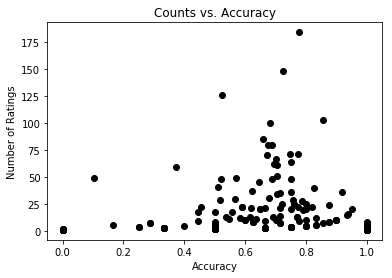

In [7]:
#Plot accuracy vs count for each turk
plot(df_rater_goodness['mean'], df_rater_goodness['count'], marker='o', linestyle='None', color='black')
xlabel('Accuracy')
ylabel('Number of Ratings')
title('Counts vs. Accuracy')
show()

There is a loose positive relationship between the number of ratings from a turk and their accuracy. However it is not entirely linear as the number of ratings becomes higher, it is more difficult to achieve perfect accuracy. That can explain why all of 100% accuracy turks have only rated a few sites. The majority of the 'good' raters fall between the 60%-80% range, but these also include the people who have rated dozens of urls or more.

# Q7

In [8]:
#New dataframe for turks that have a count above the 75th percentile (more than 11 urls)
top_turks = df_rater_goodness[df_rater_goodness['count']>df_rater_goodness['count'].quantile(0.75)]

#Merge with the urls that don't have a gold rating
df_unknown_rater = df_labels_unknown.merge(top_turks,
                                          left_on = 'turk',
                                           right_on = 'turk',
                                           suffixes = ['_un','_good'])

#Group by url to see all possible ratings and their odds
df_overall = DataFrame(df_unknown_rater.groupby(['url','category_label'])['odds'].prod())

df_overall


odds
url                                                category_label            
http://0-101.net                                   G                 2.155963
http://000.cc                                      G                 1.460583
http://0000.jp                                     G                14.488244
http://000relationships.com                        G                 5.681060
                                                   P                 1.851852
http://000vitamins.com                             G                 3.784982
http://000webhost.com                              G                11.159502
http://003my.com                                   G                 4.912040
http://007absolutehardcore.com/early_cumshots/i... P                 3.346522
                                                   R                12.290450
                                                   X               293.252871
http://007swz.cn                                   G                 1.393883
http://01768.com                                   G                 1.393883
http://0198.cc                                     G                 2.947446
http://01house.cn                                  G                 3.874200
http://01net.com                                   G                 2.463388
http://01yyy.com                                   G                 3.874200
                                                   R                 1.304682
http://020dna.com                                  G                 5.054597
                                                   R                 1.620746
http://020hp.net                                   G                 2.463388
http://020shenghuo.com                             G                 1.393883
http://021cd.com                                   G                 3.378660
http://024haha.cn                                  G                 1.460583
http://028114.com                                  G                 1.854185
http://028town.com                                 G                 3.626269
http://029bus.cn                                   G                 1.097994
                                                   P                 1.330229
http://029zp.com                                   G                 1.047852
http://02et.cn                                     G                 2.581266
...                                                                       ...
http://zoomerang.com                               G                 6.271191
http://zoominfo.com                                G                50.648819
http://zoosk.com                                   G                 1.818574
                                                   P                 1.620746
http://zoower.com                                  G                 6.796445
http://zooz.vn                                     G                 4.350366
http://zoozle.org                                  G                33.942585
http://zorkabiz.ru                                 G                 5.054597
http://zouri.jp                                    G                 1.432532
http://zoznam.sk                                   G                 2.652501
                                                   R                 2.988048
http://zqt9.com                                    G                 2.912430
http://zses.com                                    G                 2.784941
http://zshare.net                                  G                 2.423919
http://zshareblog.com                              G                 1.097994
http://zsmhl.com                                   G                 2.419121
                                                   P                 1.620746
http://ztomy.com                                   G                16.420733
http://zucaiba.com                                 G                 1.432532
http://zumin-ads.

# Q8

In [9]:
#Move categories into columns
df_result75 = DataFrame(df_overall.unstack().max(axis=1))

#IDXMAX on columns instead of rows (using 'odds' which includes all the categories)
df_result75['category'] = df_overall.unstack()['odds'].idxmax(axis=1)

#Rename columns
df_result75.columns = ['top_odds', 'top_category']

df_result75

,top_odds,top_category
url,,
http://0-101.net,2.155963,G
http://000.cc,1.460583,G
http://0000.jp,14.488244,G
http://000relationships.com,5.681060,G
http://000vitamins.com,3.784982,G
http://000webhost.com,11.159502,G
http://003my.com,4.912040,G
http://007absolutehardcore.com/early_cumshots/index.html,293.252871,X
http://007swz.cn,1.393883,G


# Q9

In [10]:
#Same as Q7 but the 25th percentile (more than 1 url rated)
more_turks = df_rater_goodness[df_rater_goodness['count']>df_rater_goodness['count'].quantile(0.25)]

df_more_raters = df_labels_unknown.merge(more_turks,
                                          left_on = 'turk',
                                           right_on = 'turk',
                                           suffixes = ['_un','_bad'])

df_overall_ext = DataFrame(df_more_raters.groupby(['url','category_label'])['odds'].prod())

#Same as Q8
df_result25 = DataFrame(df_overall_ext.unstack().max(axis=1))
df_result25['category'] = df_over all_ext.unstack()['odds'].idxmax(axis=1)
df_result25.columns = ['25odds', '25category']
df_result25

,25odds,25category
url,,
http://0-101.net,2.155963e+00,G
http://000.cc,2.181050e+03,G
http://0000.jp,2.877556e+07,G
http://000relationships.com,1.851852e+00,P
http://000vitamins.com,5.014149e+00,G
http://000webhost.com,1.113723e+07,G
http://003my.com,4.912040e+00,G
http://007absolutehardcore.com/early_cumshots/index.html,5.847515e+02,X
http://007swz.cn,1.391101e+00,G


In [11]:
#Compare ratings from top raters and the larger group of raters
cat_cross = pd.crosstab(df_result75['top_category'],df_result25['25category'])

cat_cross

25category,G,P,R,X
top_category,,,,
G,8327,574,186,216
P,189,328,47,19
R,21,34,128,25
X,27,6,26,457


The most misclassifications from the larger group are when they rate a url P when the top group rates it G (574). The highest percentage of total wrong answers was in the P category. The lower 25 group incorrectly rated the urls as G, R, or X about 40% of the time.